In [2]:
# Load libraries
options(tidyverse.quiet = TRUE)
library(tidyverse)
df = read_csv("../data/taxis_clean.csv", col_types = cols())

In [3]:
head(df)

tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount,tip_pct,pu_hour,pu_wday,pu_time_of_day_group,pu_wday_group,PUBorough,DOBorough
<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2017-02-08 15:52:19,2017-02-08 15:57:21,5,1,0.99,163,230,1.89,8.19,0.23076923,15,Wednesday,afternoon,weekday,Manhattan,Manhattan
2017-02-06 12:28:29,2017-02-06 12:32:23,2,1,0.76,237,236,1.45,7.25,0.20000000,12,Monday,afternoon,weekday,Manhattan,Manhattan
2017-02-28 07:57:50,2017-02-28 08:06:32,5,1,1.18,140,162,1.66,9.96,0.16666667,7,Tuesday,morning,weekday,Manhattan,Manhattan
2017-02-26 02:36:29,2017-02-26 02:50:51,1,1,5.32,164,166,1.00,18.80,0.05319149,2,Sunday,middle_night,weekend,Manhattan,Manhattan
2017-02-25 21:50:27,2017-02-25 21:55:25,1,1,1.04,236,237,1.36,8.16,0.16666667,21,Saturday,evening,weekend,Manhattan,Manhattan
2017-02-25 00:41:23,2017-02-25 01:03:15,1,1,3.50,148,181,1.50,18.80,0.07978723,0,Saturday,middle_night,weekend,Manhattan,Brooklyn


Run a linear regression model, with variables broken down as: 
- outcome: 
    - Tip percentage
- key predictors: 
    - time of day, and day of week. Logically, there may be an interaction between these two effects, which will be include in the model.
- potential confounders: 
    - location, trip distance, number of passengers

In [4]:
interactive_mod <- lm(tip_pct ~ trip_distance + total_amount + PUBorough + pu_time_of_day_group*pu_wday_group, data = df)

Warning message:
“'newdata' had 80 rows but variables found have 999898 rows”
Warning message:
“Computation failed in `stat_smooth()`:
variable lengths differ (found for 'df$total_amount')”


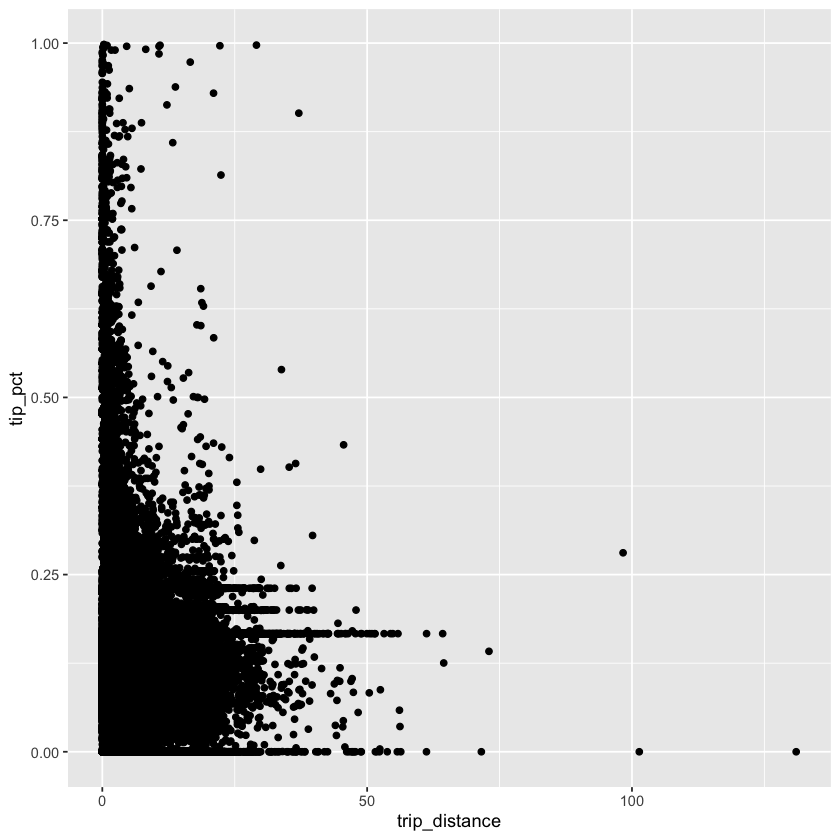

In [5]:
ggplot(df) + aes(x = trip_distance, y = tip_pct) + 
        geom_point() + 
        geom_smooth(method = lm,
                    formula = y ~ x + df$total_amount + df$PUBorough + df$pu_time_of_day_group*df$pu_wday_group,
                   se = FALSE)




In [11]:
summary(interactive_mod)


Call:
lm(formula = tip_pct ~ trip_distance + total_amount + PUBorough + 
    pu_time_of_day_group * pu_wday_group, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69264 -0.01572  0.01011  0.01644  0.88541 

Coefficients:
                                                        Estimate Std. Error
(Intercept)                                            1.136e-01  2.496e-03
trip_distance                                         -5.719e-03  3.602e-05
total_amount                                           1.290e-03  8.903e-06
PUBoroughBrooklyn                                      3.811e-02  2.532e-03
PUBoroughEWR                                          -1.033e-01  6.531e-03
PUBoroughManhattan                                     3.657e-02  2.492e-03
PUBoroughQueens                                        4.523e-02  2.505e-03
PUBoroughStaten Island                                -3.009e-02  2.347e-02
PUBoroughUnknown                                       3.134e-02  2.52

Simple model: check for differences in group means, for this we will run an anova.
Ho: all group means are equal.
Ha: at least some group means are not equal.

Looking only at time of day as a predictor

In [3]:
aov1 <- aov(tip_pct ~ pu_time_of_day_group,
            data = df)

In [4]:
summary(aov1)

                         Df Sum Sq Mean Sq F value Pr(>F)    
pu_time_of_day_group      3      2  0.6518   233.2 <2e-16 ***
Residuals            999894   2795  0.0028                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [7]:
aov2 <- aov(tip_pct ~ pu_time_of_day_group*pu_wday_group, data = df)
summary(aov2)

                                       Df Sum Sq Mean Sq F value Pr(>F)    
pu_time_of_day_group                    3    2.0  0.6518   233.4 <2e-16 ***
pu_wday_group                           1    1.2  1.1660   417.5 <2e-16 ***
pu_time_of_day_group:pu_wday_group      3    1.0  0.3363   120.4 <2e-16 ***
Residuals                          999890 2792.6  0.0028                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [81]:
aov <- aov(tip_pct ~ pu_time_of_day_group + trip_distance + passenger_count + pu_wday_group + PULocationID,
            data = df)

In [80]:
summary(aov)

                         Df Sum Sq Mean Sq  F value Pr(>F)    
pu_time_of_day_group      3    2.0   0.652  235.771 <2e-16 ***
trip_distance             1    9.2   9.213 3332.196 <2e-16 ***
passenger_count           1    0.0   0.003    1.042  0.307    
pu_wday_group             1    1.2   1.229  444.512 <2e-16 ***
PULocationID            233   20.6   0.088   31.906 <2e-16 ***
Residuals            999658 2763.8   0.003                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [5]:
pairwise.t.test(df$tip_pct, df$pu_time_of_day_group, p.adj = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  df$tip_pct and df$pu_time_of_day_group 

             afternoon evening middle_night
evening      < 2e-16   -       -           
middle_night < 2e-16   < 2e-16 -           
morning      9.4e-08   0.0037  < 2e-16     

P value adjustment method: bonferroni 

In [ ]:
aov(tip_pct ~ pu_time_of_day_group + trip_distance + passenger_count + pu_wday_group + PULocationID,
            data = df)

In [22]:
library(tidyverse)
library(rstatix)
library(broom)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [45]:
head(df)

tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount,tip_pct,pu_hour,pu_wday,pu_time_of_day_group,pu_wday_group
<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2017-02-08 15:52:19,2017-02-08 15:57:21,5,1,0.99,163,230,1.89,8.19,23.076923,15,Wednesday,afternoon,weekday
2017-02-06 12:28:29,2017-02-06 12:32:23,2,1,0.76,237,236,1.45,7.25,20.000000,12,Monday,afternoon,weekday
2017-02-28 07:57:50,2017-02-28 08:06:32,5,1,1.18,140,162,1.66,9.96,16.666667,7,Tuesday,morning,weekday
2017-02-26 02:36:29,2017-02-26 02:50:51,1,1,5.32,164,166,1.00,18.80,5.319149,2,Sunday,middle_night,weekend
2017-02-25 21:50:27,2017-02-25 21:55:25,1,1,1.04,236,237,1.36,8.16,16.666667,21,Saturday,evening,weekend
2017-02-25 00:41:23,2017-02-25 01:03:15,1,1,3.50,148,181,1.50,18.80,7.978723,0,Saturday,middle_night,weekend


In [30]:
res.aov <- df %>% anova_test(tip_pct ~ trip_distance + passenger_count + pu_time_of_day_group)
get_anova_table(res.aov)

Coefficient covariances computed by hccm()



Effect,DFn,DFd,F,p,p<.05,ges
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
trip_distance,1,999892,3305.605,0.00e+00,*,3.00e-03
passenger_count,1,999892,1.034,3.09e-01,,1.03e-06
pu_time_of_day_group,3,999892,188.276,4.60e-122,*,5.65e-04


In [42]:
df %>% select(tip_pct) %>% pull() %>% mean()

[1] 1549.02

In [46]:
summary(lm(tip_pct ~ trip_distance + pu_time_of_day_group, data = df))


Call:
lm(formula = tip_pct ~ trip_distance + pu_time_of_day_group, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.868  -1.576   1.002   1.499  86.651 

Coefficients:
                                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                      15.867981   0.010636 1491.876  < 2e-16 ***
trip_distance                    -0.084159   0.001463  -57.506  < 2e-16 ***
pu_time_of_day_groupevening      -0.138099   0.014387   -9.599  < 2e-16 ***
pu_time_of_day_groupmiddle_night -0.355653   0.015216  -23.373  < 2e-16 ***
pu_time_of_day_groupmorning      -0.090024   0.014324   -6.285 3.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.278 on 999893 degrees of freedom
Multiple R-squared:  0.003993,	Adjusted R-squared:  0.003989 
F-statistic:  1002 on 4 and 999893 DF,  p-value: < 2.2e-16


In [48]:
summary(lm(tip_pct ~ trip_distance + pu_time_of_day_group*pu_wday_group, data = df))


Call:
lm(formula = tip_pct ~ trip_distance + pu_time_of_day_group * 
    pu_wday_group, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.938  -1.557   0.991   1.626  87.043 

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                           15.937986   0.012401
trip_distance                                         -0.085291   0.001463
pu_time_of_day_groupevening                           -0.173013   0.016774
pu_time_of_day_groupmiddle_night                      -0.150834   0.019328
pu_time_of_day_groupmorning                           -0.168770   0.016502
pu_wday_groupweekend                                  -0.223829   0.021312
pu_time_of_day_groupevening:pu_wday_groupweekend       0.087682   0.032823
pu_time_of_day_groupmiddle_night:pu_wday_groupweekend -0.409905   0.031775
pu_time_of_day_groupmorning:pu_wday_groupweekend       0.284367   0.033918
                                         

In [63]:
lm <- lm(tip_pct ~ trip_distance + total_amount + pu_time_of_day_group*pu_wday_group, data = df)

In [70]:
pairwise.t.test(df$tip_pct, df$pu_time_of_day_group, p.adj = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  df$tip_pct and df$pu_time_of_day_group 

             afternoon evening middle_night
evening      < 2e-16   -       -           
middle_night < 2e-16   < 2e-16 -           
morning      9.4e-08   0.0037  < 2e-16     

P value adjustment method: bonferroni 

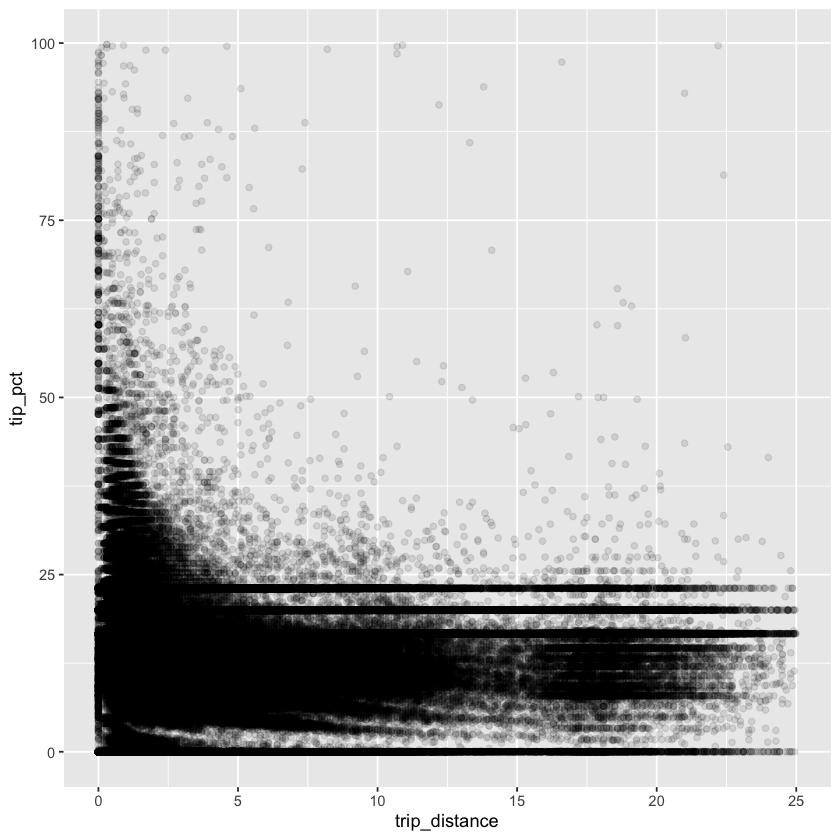

In [59]:
df %>% filter(trip_distance < 25) %>% ggplot() + aes(x = trip_distance, y = tip_pct) + geom_point(alpha = 0.1)

In [49]:
summary((aov(tip_pct ~  trip_distance + passenger_count + pu_time_of_day_group, data = df)))

                         Df   Sum Sq Mean Sq  F value Pr(>F)    
trip_distance             1    95915   95915 3442.914 <2e-16 ***
passenger_count           1       60      60    2.152  0.142    
pu_time_of_day_group      3    15735    5245  188.276 <2e-16 ***
Residuals            999892 27855633      28                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [38]:
df %>% pairwise.t.test(tip_pct, pu_time_of_day_group, p.adj = "bonferonni")

ERROR: Error in pairwise.t.test(., tip_pct, pu_time_of_day_group, p.adj = "bonferonni"): object 'pu_time_of_day_group' not found


In [ ]:
head(df)